# Statistics for Data Analysis: R Exercises 1

In this practical we review the essentials to start with R programming and we learn to import simple datasets in R and to compute summary statistics and basic graphs.

## Summary of R basics

### Mathematical Operations:

Exactly the same as Python

In [1]:
2+3
2*3
3*4
8/2
sqrt(2) # square root
exp(2) # natural exponential
2^3 # power

[1] 5

[1] 6

[1] 12

[1] 4

[1] 1.414214

[1] 7.389056

[1] 8

### Defining Variables

R either uses a left arrow, or equal sign, to assign values to variables.

In [2]:
a<-1 
b<-2
a+b

[1] 3

In [3]:
a=5
b=2
a+b

[1] 7

R variables are __untyped__, but the object they __reference__ is typed.

In [4]:
typeof(a)

[1] "double"

### Dataframes

Datasets in R can be stored either as ___vectors___ (__single variables__), or ___dataframes___ when dealing with __multiple variables__.

In [5]:
# Vector definition
x<-c(5,2,6,1)
y<-c('a','b','c','d') 
z<-1:4

x
y
z

[1] 5 2 6 1

[1] "a" "b" "c" "d"

[1] 1 2 3 4

__Vectors__ must contain objects of the __same datatype__. 

__Dataframes__ can include vectors of __different types__, but they must be of the __same length__, because each row is interpreted as an observation.

In [6]:
data<-data.frame(x,y,z)  # Create df
head(data)  # Peek at first rows of df 

x,y,z
5,a,1
2,b,2
6,c,3
1,d,4


In [7]:
data[1,2]  # Access one element of dataframe

[1] a
Levels: a b c d

In [8]:
data[1,]  # Access 1st row (observation)

x,y,z
5,a,1


In [9]:
data[,2]  # 2nd Column (variable)

[1] a b c d
Levels: a b c d

You can also access elements using the variable (__column__) names:

In [10]:
data$x

[1] 5 2 6 1

### Built-in Functions

Here are some useful functions native to R:

[1] 3.5

[1] 14

[1] 6

[1] 2.380476

y
a b c d 
1 1 1 1 

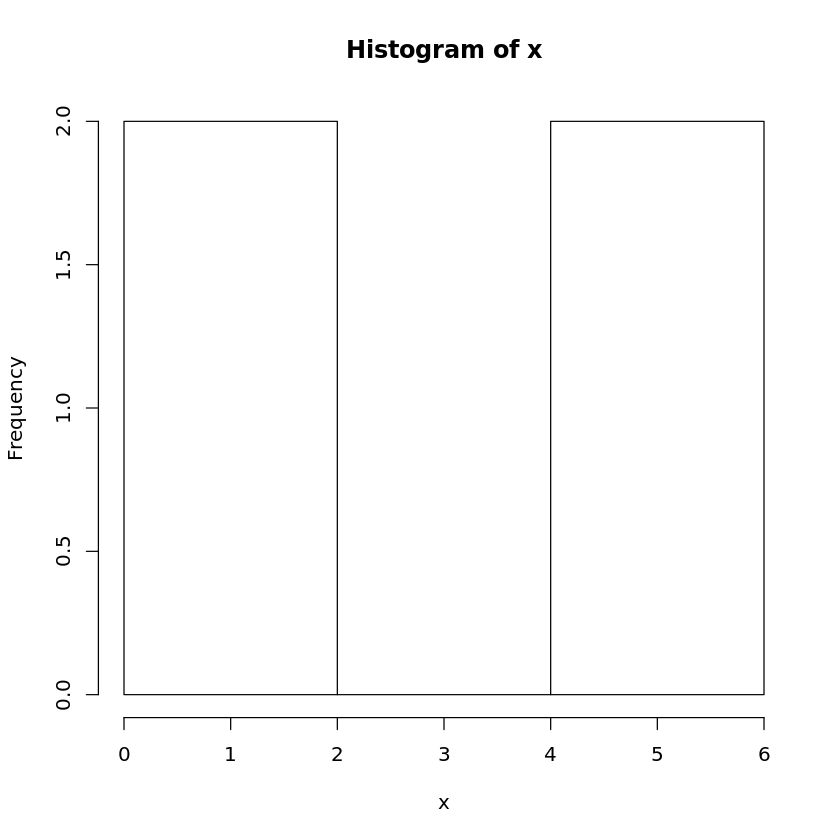

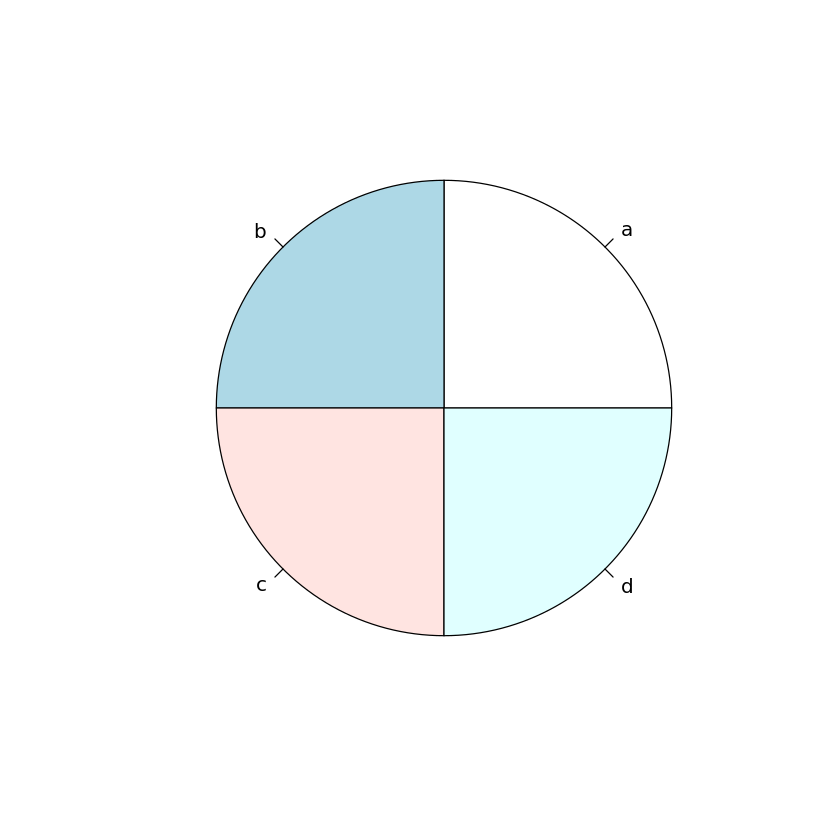

In [11]:
mean(x)
sum(x)
max(x)
sd(x)
table(y)  # Frequency table
hist(x)
pie(table(y))

## Data Import and Export

Reading in data can be done using the ```read``` class of functions.

In [12]:
data = read.csv('data/mussels.csv')

In [13]:
head(data)

Mass,Height,Width,Length
498.1267,158,68,318
440.6753,148,56,312
286.9056,124,46,265
170.7398,104,38,222
379.1426,143,51,274
166.5419,99,35,216


## Help

The ```help()``` function will conveniently look up documentation for any __string__ within its parentheses.

In [14]:
help("mean")

# Exercises

2. Create a dataframe using the data provided in the worksheet.

In [15]:
# First, create vectors (columns)
country <-c ('Belgium','Denmark','France','GB','Ireland','Italy','Luxembourg')
inflation_rate <- c(2.8,1.2,2.1,1.6,1.5,4.6,3.6)
unemployment_rate <- c(9.4,10.4,10.8,10.5,18.4,11.1,2.6)

In [16]:
# Create dataframe from previous vectors
df <- data.frame(country,inflation_rate,unemployment_rate)

In [17]:
# Peek at top of dataframe
head(df)

country,inflation_rate,unemployment_rate
Belgium,2.8,9.4
Denmark,1.2,10.4
France,2.1,10.8
GB,1.6,10.5
Ireland,1.5,18.4
Italy,4.6,11.1


You can filter dataframes using the the using ```subset()``` function, and ```select=``` option to specify which columns to filter. If multiple, provide the columns as a vector.
 
### Inflation Rate Descriptive Statistics

In [18]:
# Country with highest inflation rate
subset(df,inflation_rate==max(inflation_rate),select=c(country,inflation_rate))

,country,inflation_rate
6,Italy,4.6


In [19]:
# Minimum inflation rate
subset(df,inflation_rate==min(inflation_rate),select=c(country,inflation_rate))

,country,inflation_rate
2,Denmark,1.2


In [20]:
# Range of Inflation rate
max(df$inflation_rate) - min(df$inflation_rate)

[1] 3.4

In [21]:
# Median inflation rate
subset(df,inflation_rate==median(inflation_rate),select=c(country,inflation_rate))

,country,inflation_rate
3,France,2.1


In [22]:
# Interquartile Range of inflation rate
IQR(df$inflation_rate)

[1] 1.65

In [23]:
# Mean of inflation rate
mean(df$inflation_rate)

[1] 2.485714

In [24]:
# Variance of inflation rate
var(df$inflation_rate)

[1] 1.561429

In [25]:
# Standard deviation of inflation rate
sd(df$inflation_rate)

[1] 1.249571

Now, let's investigate the __unemployment rate__. 

In [26]:
# Country with the highest unemployment rate
subset(df,unemployment_rate==max(unemployment_rate),select=c(country,unemployment_rate))

,country,unemployment_rate
5,Ireland,18.4


In [27]:
# Country with the lowest unemployment rate
subset(df,unemployment_rate==min(unemployment_rate),select=c(country,unemployment_rate))

,country,unemployment_rate
7,Luxembourg,2.6


In [28]:
# Range of unemployment rate
max(df$unemployment_rate) - min(df$unemployment_rate)

[1] 15.8

In [29]:
# Median unemployment rate
subset(df,unemployment_rate==median(unemployment_rate),select=c(country,unemployment_rate))

,country,unemployment_rate
4,GB,10.5


# 3. Mussels

Plot appropriate graphs to represent the __distribution__ of the __Mass__ variable. 

In [30]:
data<-read.csv("data/mussels.csv",header=TRUE)

In [31]:
head(data)

Mass,Height,Width,Length
498.1267,158,68,318
440.6753,148,56,312
286.9056,124,46,265
170.7398,104,38,222
379.1426,143,51,274
166.5419,99,35,216


In [43]:
help(hist)

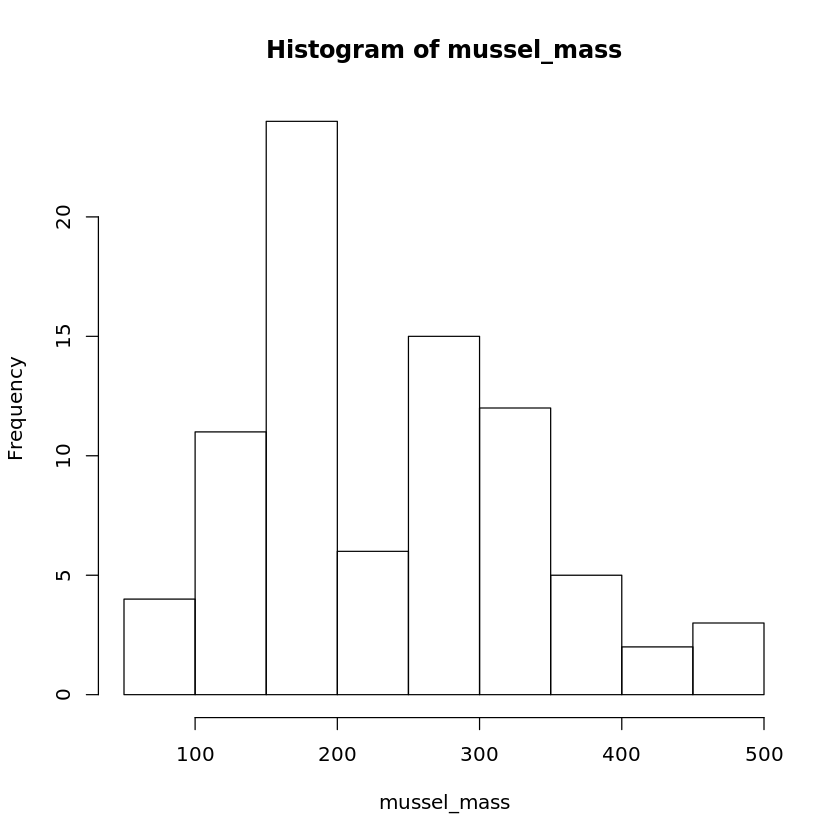

In [32]:
mussel_mass = data$Mass
hist(mussel_mass)

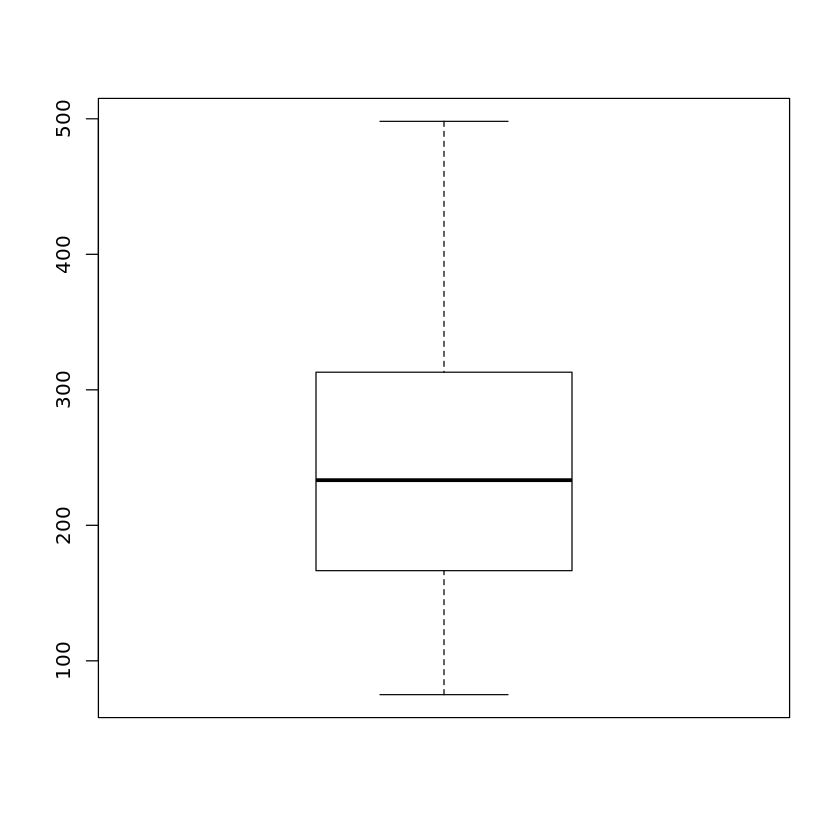

In [33]:
boxplot(mussel_mass)

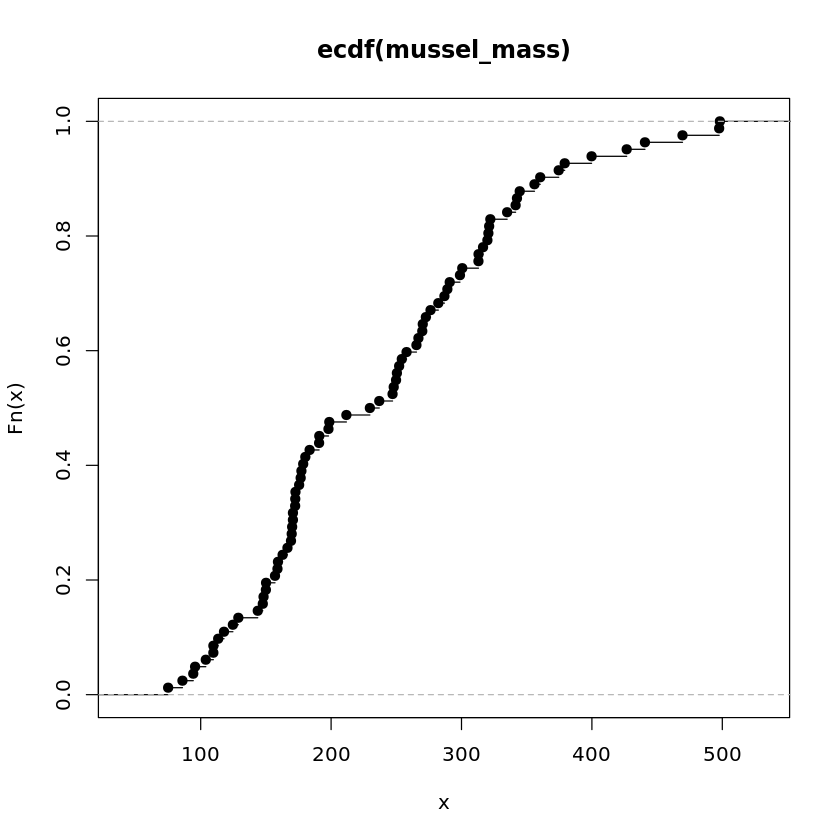

In [68]:
# Empirical Cumulative Density Function
plot(ecdf(mussel_mass))

## Predicting Mussel Mass

As an extra piece of work, let's try to create a statistical model from scratch which can predict mussel mass.

In [55]:
# Split data into targets and features
X = subset(data, select=c(Height, Width, Length))
y = subset(data, select=c(Mass))

head(y)
head(X)

Mass
498.1267
440.6753
286.9056
170.7398
379.1426
166.5419


Height,Width,Length
158,68,318
148,56,312
124,46,265
104,38,222
143,51,274
99,35,216


In [ ]:
def model(X, m, c):
    return m * X + c

In [ ]:
RSS = (y-model(X))^2  # Residual sum of squares error

In [ ]:
# Minimize RSS using gradient descent.
# 1. Determine gradient of loss function w.r.t model parameters
# Update parameters in the direction of negative gradient times learning_rate

In [71]:
# Randomly initialize model parameters
m_height = 0.5
m_width = 0.5
m_length = 0.5

In [72]:
theta = c(m_height, m_width, m_length)  # Should include the bias
theta

[1] 0.5 0.5 0.5

In [73]:
dtheta = 2*(y-theta*X)*theta

ERROR: Error in Ops.data.frame(y, theta * X): ‘-’ only defined for equally-sized data frames


In [78]:
learning_rate = 0.1

In [ ]:
dtheta = theta - learning_rate*dtheta

In [ ]:
# runs until dtheta < threshold